### Edgar Moises Hernandez-Gonzalez
#### 01/04/20-03/04/20
#### Clasificacion de CIFAR10 con data augmentation
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 77.27%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
# las etiquetas en categorical para poder entrenar data augmentation
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [0]:
datagen_train = ImageDataGenerator(
	rotation_range=20, #10
	width_shift_range=0.2, #0.1
	height_shift_range=0.2, #0.1
	zoom_range=0.2, #0.15
	shear_range=0.2, #0.15
	horizontal_flip=True,
	fill_mode='nearest')

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
history = model.fit_generator(datagen_train.flow(x_train, y_train_categorical, batch_size=128),
                              steps_per_epoch=np.ceil(n_samples_train/128),
                              epochs=100,
                              validation_data=(x_test, y_test_categorical),
                              verbose=2)
# no se usa porque validation_data no es un generador
#validation_steps=np.ceil(n_samples_test/128)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
391/391 - 21s - loss: 1.9026 - accuracy: 0.2884 - val_loss: 1.5765 - val_accuracy: 0.4189
Epoch 2/100
391/391 - 20s - loss: 1.6396 - accuracy: 0.3973 - val_loss: 1.4202 - val_accuracy: 0.4798
Epoch 3/100
391/391 - 20s - loss: 1.5278 - accuracy: 0.4474 - val_loss: 1.2653 - val_accuracy: 0.5479
Epoch 4/100
391/391 - 20s - loss: 1.4583 - accuracy: 0.4715 - val_loss: 1.2868 - val_accuracy: 0.5354
Epoch 5/100
391/391 - 20s - loss: 1.4008 - accuracy: 0.4954 - val_loss: 1.1680 - val_accuracy: 0.5799
Epoch 6/100
391/391 - 20s - loss: 1.3578 - accuracy: 0.5146 - val_loss: 1.2106 - val_accuracy: 0.5661
Epoch 7/100
391/391 - 20s - loss: 1.3207 - accuracy: 0.5264 - val_loss: 1.1154 - val_accuracy: 0.6026
Epoch 8/100
391/391 - 20s - loss: 1.3001 - accuracy: 0.5359 - val_loss: 1.1050 - val_accuracy: 0.6041
Epoch 9/100
391/391 - 20s - loss: 1.2703 - accuracy: 0.5473 - val_loss: 1.1361 - val_accuracy: 0.6003
Epoch 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.6632 - accuracy: 0.7727
Test loss: 0.6631577014923096
Test accuracy: 0.7727000117301941


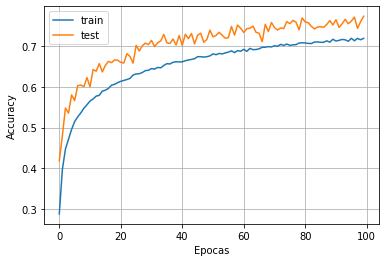

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

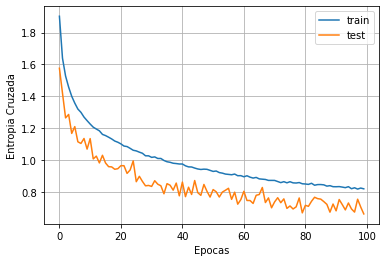

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [16]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[802  39  13  13   7   1   5  15  56  49]
 [  2 935   1   0   0   1   3   3   3  52]
 [ 68  10 591  31  49  51 119  51   8  22]
 [ 13  18  37 521  29 165 101  59  18  39]
 [ 20   4  19  24 671  18 105 124   7   8]
 [  5   6  23  88  29 720  28  80   3  18]
 [  8   9  14  30  15   7 896  10   5   6]
 [  9   6  13  21  17  31  23 863   1  16]
 [ 48  45   4   5   4   1   5   7 837  44]
 [ 13  67   1   3   1   0   6   7  11 891]]


In [17]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.82      0.94      0.87      1000
           2       0.83      0.59      0.69      1000
           3       0.71      0.52      0.60      1000
           4       0.82      0.67      0.74      1000
           5       0.72      0.72      0.72      1000
           6       0.69      0.90      0.78      1000
           7       0.71      0.86      0.78      1000
           8       0.88      0.84      0.86      1000
           9       0.78      0.89      0.83      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

